# Introduction

Music Genre classification is one of the branches of Music Information Retrieval (MIR). A robust recommendation system begins with the categorization of music genres. Sound processing is a huge research area through which we can find solutions to various medical or mental issues through music therapy solutions. There are various music applications such as Spotify, Google Play, Apple Music, etc., but for implementation, one of the most important steps is to classify the genre of a music which requires audio processing, it is one of the most complex tasks that involves time signal processing, time series, spectrograms, spectral coefficients, and audio feature extraction to feed a neural network.

# Data Download

In [ ]:
!gdown 1MGhyeMngD6P9Kz9zJpL68ylQaIQvW7Zx
!unzip GTZAN.zip -d /content/GTZAN
!rm GTZAN.zip

Downloading...
From: https://drive.google.com/uc?id=1MGhyeMngD6P9Kz9zJpL68ylQaIQvW7Zx
To: /content/GTZAN.zip
100% 1.30G/1.30G [00:12<00:00, 105MB/s] 
Archive:  GTZAN.zip
  inflating: /content/GTZAN/features_30_sec.csv  
  inflating: /content/GTZAN/features_3_sec.csv  
  inflating: /content/GTZAN/genres_original/blues/blues.00000.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00001.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00002.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00003.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00004.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00005.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00006.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00007.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00008.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00009.wav  
  inflating: /content/GTZAN/genres_original/blues/b

# Dataset description

The dataset used is GTZAN (the famous GTZAN dataset, the MNIST of sounds)

The GTZAN dataset contains 1000 audio files. Contains a total of 10 genres, each genre contains 100 audio files

1. Blues

2. Classical

3. Country

4. Disco

5. Hip-hop

6. Jazz

7. Metal

8. Pop

9. Reggae

10. Rock

**Genres original**

> A compilation of ten genres, each with 100 audio recordings, each lasting 30 seconds (the famous GTZAN dataset, the MNIST of sounds)

**Images original**

> Each audio file has a visual representation. Neural networks are one technique to classify data because they usually take in some form of picture representation.

**CSV files**

> The audio files' features are contained within. Each song lasts for 30 seconds long has a mean and variance computed across several features taken from an audio file in one file. The songs are separated into 3 second audio files in the other file, which has the same format.

### ***Dive deep with me into the world of data! While the dataset has graciously done some of the heavy lifting by extracting certain features for us, we're about to embark on a thrilling journey to uncover the mysteries behind these features. Let's truly understand their essence and the magic of how to obtain them. So, why not take a bold step? Let's delete those pre-existing folders and craft our own path in this adventure!***

In [ ]:
!rm -r /content/GTZAN/images_original
!rm /content/GTZAN/features_30_sec.csv
!rm /content/GTZAN/features_3_sec.csv

# Let check an examples data file

In [ ]:
data_path = '/content/GTZAN/genres_original/reggae/reggae.00000.wav'

This file is in ***.wav*** format, short for "Waveform Audio File Format," is an uncompressed audio format developed by Microsoft and IBM. It's known for delivering high-quality sound, making it a favorite among professionals like musicians and sound engineers. However, this quality comes at the cost of larger file sizes. Structured in "chunks" of data, it's widely compatible with most audio software and devices. While ideal for professional use, its size might make it less practical for casual listening or devices with limited storage.

### ***For those seeking a robust and systematic approach to .wav file analysis, the `librosa` library in Python offers advanced audio processing capabilities grounded in scientific principles.***

In [ ]:
import librosa

# Load a .wav file using librosa
data, sr = librosa.load(data_path) # Sampling rate = 22050

By default, librosa will load a .wav file with a ***sampling rate of 22,050 Hz***. We will delve into the meaning of the sampling rate later. First, let's listen to our music.

In [ ]:
# Playing audio file
import IPython

IPython.display.Audio(data,rate=sr)

# Signal Processing Fundamentals

## Wave Form

##### **Can we see what we just heard?** The answer is **YES**, via **Wave Form** plot

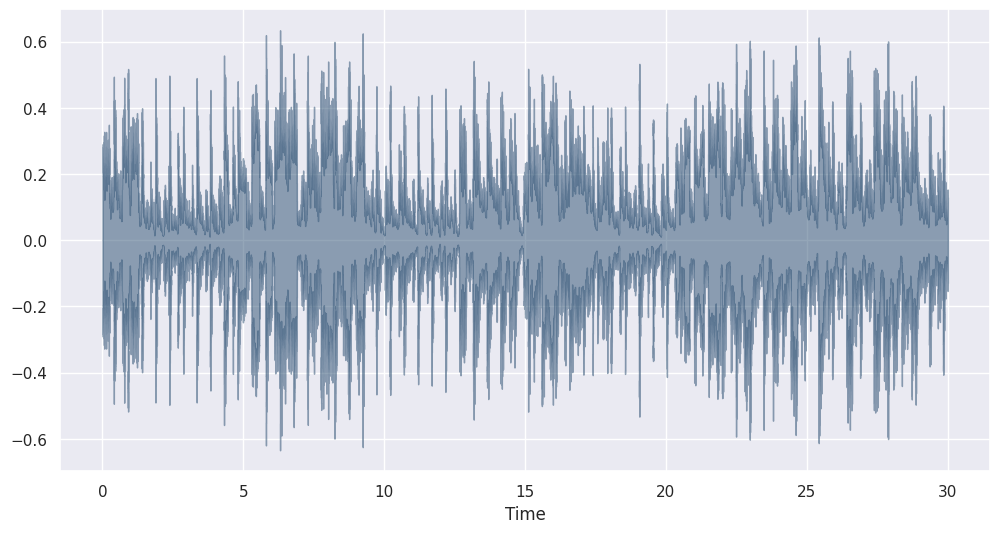

In [ ]:
import matplotlib.pyplot as plt

# Wave form of the audio
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha = 0.5)
plt.show()

* Sound is a type of energy made by vibrations. When any object vibrates, it causes movement in the air particles. These particles bump into the particles close to them, which makes them vibrate too, causing them to bump into more air particles. This movement, called sound waves, keeps going until they run out of energy. When these sound waves reach our ears, they make our eardrums vibrate too, and our brain interprets this as sound.

* A waveform represents the shape and form of a signal (like a sound) in terms of its amplitude over time. In the context of sound, a waveform graphically represents the variation of pressure (or amplitude) of a sound wave against time.

* A waveform plot is a visual representation of an audio signal. It displays how the amplitude of the sound signal varies with time. On the vertical axis, you have amplitude, which can be thought of as the loudness or intensity of the sound. On the horizontal axis, you have time. Peaks in the waveform represent moments of high amplitude (loud sounds), while troughs or valleys represent moments of low amplitude (soft sounds).

* In essence, a waveform plot gives us a visual snapshot of the dynamics of a sound. It allows us to see the loudness and quietness of a sound signal over its duration, providing insights into its characteristics and structure.

## Sampling rate

> **When we load a .wav file using librosa, the default sampling rate is 22,050Hz, what does this value mean?**

> Sound, in its natural form, is a **continuous analog signal**. To enable digital processing of these signals, they must be converted into a **discrete digital format** through a process called **'sampling'**. The 'sampling rate', quantified in Hertz (Hz), denotes the **number of samples taken per second** from the continuous signal.

> The importance of the sampling rate in signal processing is multifaceted. Primarily, it ensures the accurate digital representation of an analog signal. The **Nyquist-Shannon Sampling Theorem** stipulates that to avoid loss of information, a signal must be sampled **at least twice its highest frequency**. This ensures that all frequency components of the signal are accurately captured.

> However, the choice of sampling rate also has practical implications. A **higher sampling rate** results in **increased data volume and computational demands**, while a **lower rate** may lead to **loss of signal detail**.

> In **Music Information Retrieval (MIR)**, an appropriate sampling rate is crucial. MIR involves extracting specific features from audio signals for tasks such as pitch detection or genre classification. An optimal sampling rate ensures accurate feature extraction and subsequent analysis.

> Typically, the choice of sampling rate is application-dependent. For standard audio playback, as in CDs, a rate of 44.1 kHz is used, capturing the full audible spectrum for humans, approximately 20 Hz to 20 kHz. Professional audio applications might employ rates of 48 kHz, 96 kHz, or even 192 kHz for enhanced detail. For voice-centric applications, rates as low as 8 kHz or 16 kHz might be adequate.

> In the context of MIR, 44.1 kHz is commonly adopted due to its balance between capturing the full range of human hearing and computational efficiency. However, specific tasks or computational resources might necessitate alternative rates.

> In summary, the sampling rate is a critical parameter in digital signal processing, ensuring both the accurate representation of analog signals and computational feasibility.

##### **Let experiment with some Sampling Rate value**

###### Sampling rate = 22050 / Default

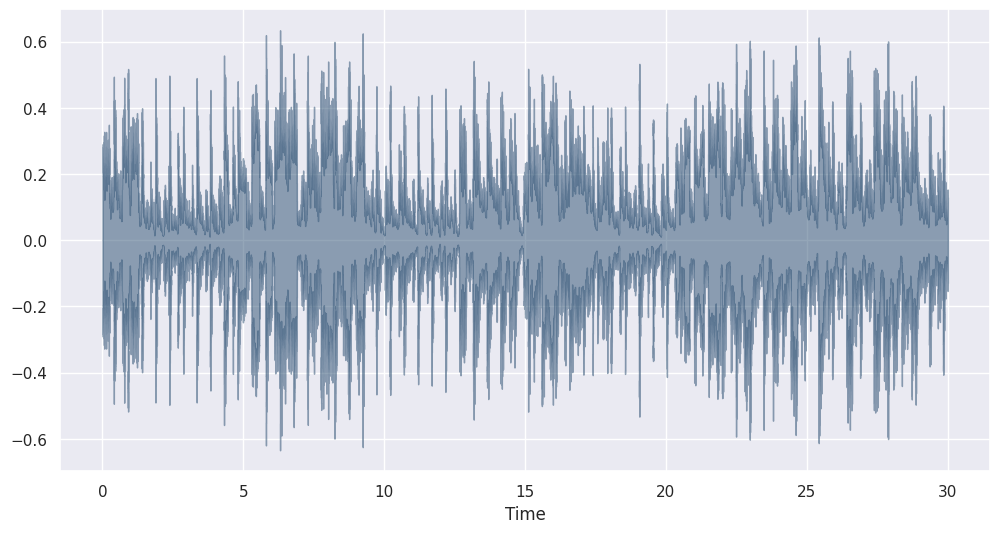

In [ ]:
data, sr = librosa.load(data_path)

plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha = 0.5, sr=22050)
plt.show()

In [ ]:
IPython.display.Audio(data,rate=sr)

###### Sampling rate = 44100 / Standard for MIR

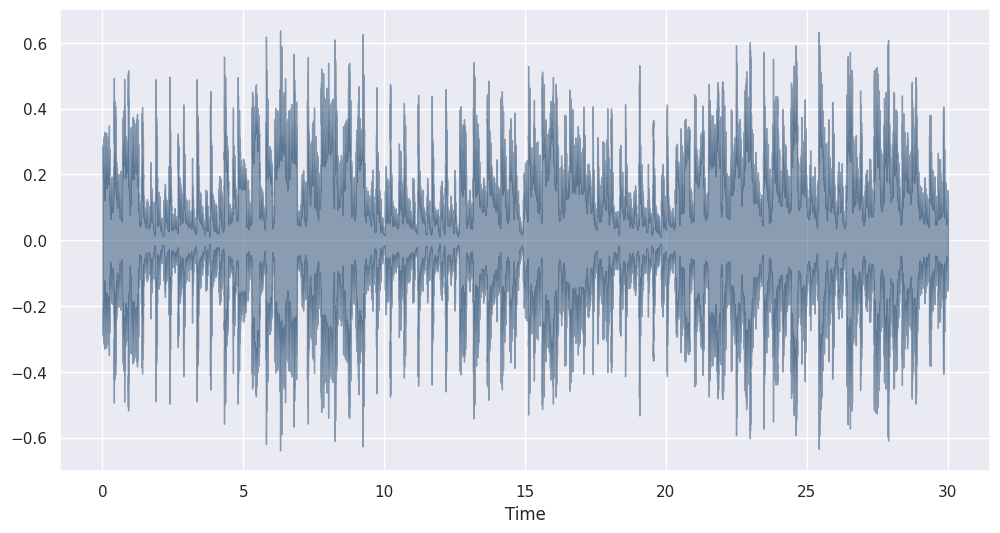

In [ ]:
data, sr = librosa.load(data_path, sr=44100)

plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha = 0.5, sr=44100)
plt.show()

In [ ]:
IPython.display.Audio(data,rate=sr)

This cell output is too large and can only be displayed while logged in.


> We can somewhat discern the difference, but it's subtle. However, the number of our samples has **doubled**.

###### Sampling rate = 8000 / Low-end for speech task

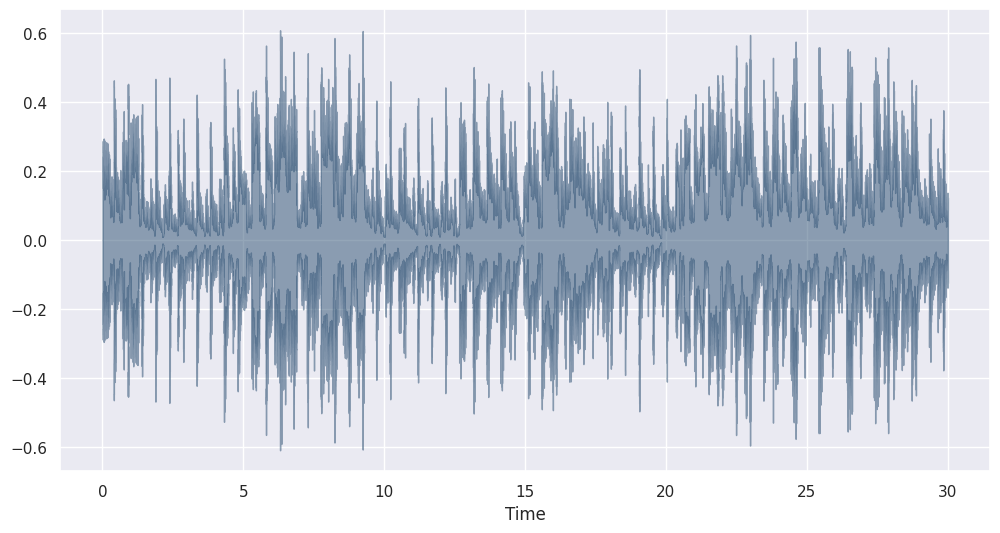

In [ ]:
data, sr = librosa.load(data_path, sr=8000)

plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha = 0.5, sr=8000)
plt.show()

In [ ]:
IPython.display.Audio(data,rate=sr)

> We cannot clearly see the difference, but we can definitely hear it. If you pay attention, you would notice that some high-frequency instruments are not audible.

###### ***Let's take it to the extreme***

###### Sampling rate = 1000

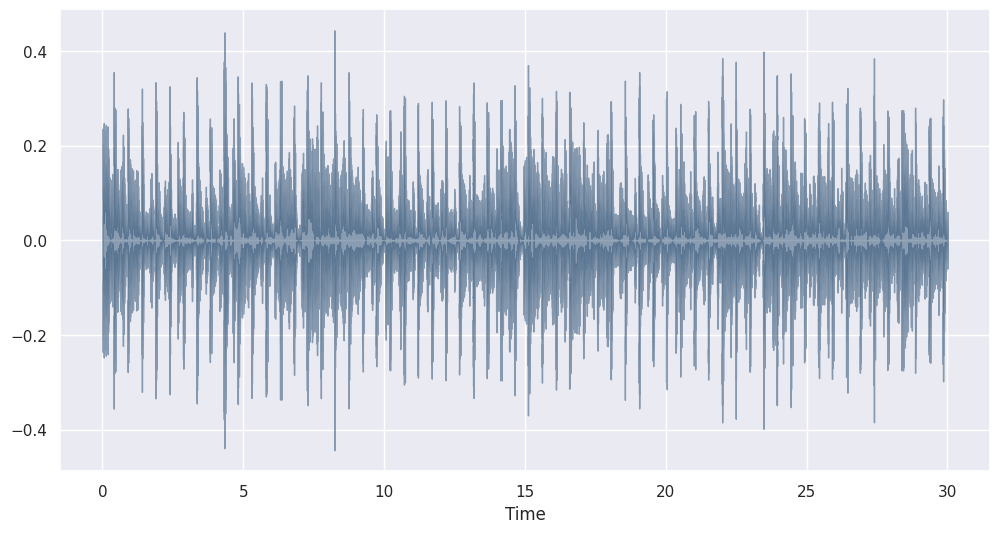

In [ ]:
data, sr = librosa.load(data_path, sr=1000)

plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha = 0.5, sr=1000)
plt.show()

In [ ]:
IPython.display.Audio(data,rate=sr)

###### Sampling rate = 10

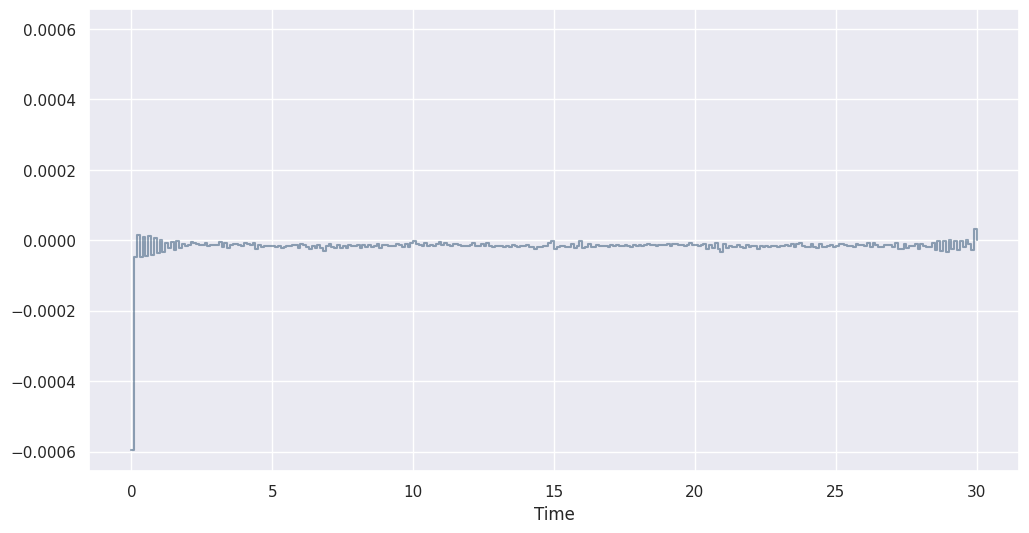

In [ ]:
data, sr = librosa.load(data_path, sr=10)

plt.figure(figsize=(12,6))
librosa.display.waveshow(data, color="#2B4F72", alpha = 0.5, sr=10)
plt.show()

In [ ]:
IPython.display.Audio(data,rate=sr)

***Where Has the Sound Gone?***

The sound has become inaudible to us because its frequency has dropped below the human hearing threshold, which starts at 20Hz. This means that the sound's frequency is now outside the range that the human ear can detect and interpret.

> **A waveform is a one-dimensional representation of an audio signal because it displays the amplitude of the sound wave as a function of time. The waveform captures basic attributes of sound, such as volume and duration. However, it does not provide any information about the frequency content of the signal, and therefore, it cannot fully represent all the nuances and complexities of music.**

## Spectrogram

> Unlike a waveform, which captures changes in air pressure that produce sound waves, a spectrogram dissects an audio signal into its constituent frequencies. It then plots the amplitude of each frequency component as a function of time. Compared to waveform analysis, a spectrogram is more suited for capturing characteristics related to frequency, pitch, and timbre of music. It provides a detailed view of how different frequencies are distributed over time, making it invaluable for tasks like speech recognition, music analysis, and understanding complex soundscapes. However, while it excels in frequency domain representation, it might not offer as much insight into the temporal dynamics and rhythm of the music.

> ***In simpler terms, it shows how different frequencies are present or absent at different moments in time within an audio signal.***

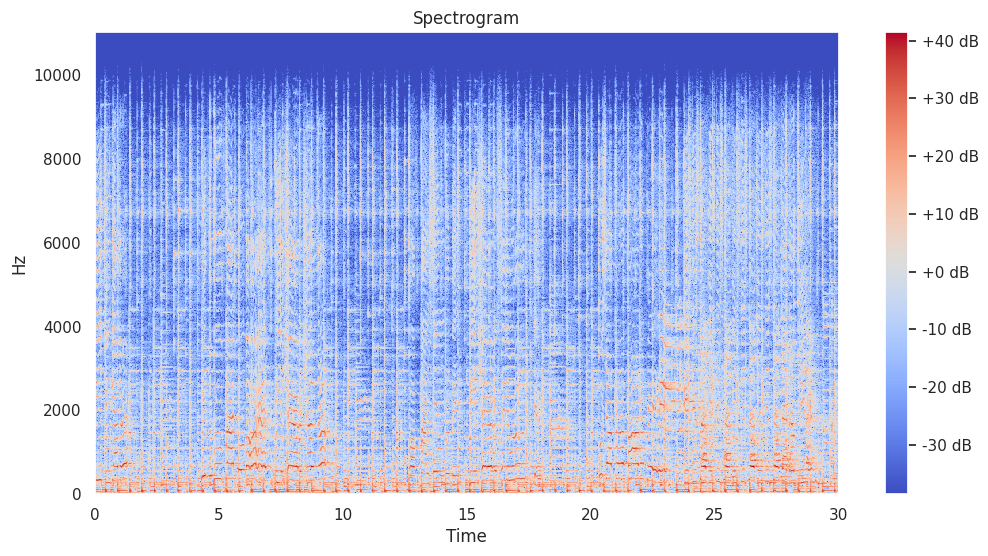

In [ ]:
# Let load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Spectrogram of the audio
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')

Now let see the spectrogram when we load .wav file with sampling rate of 8000Hz

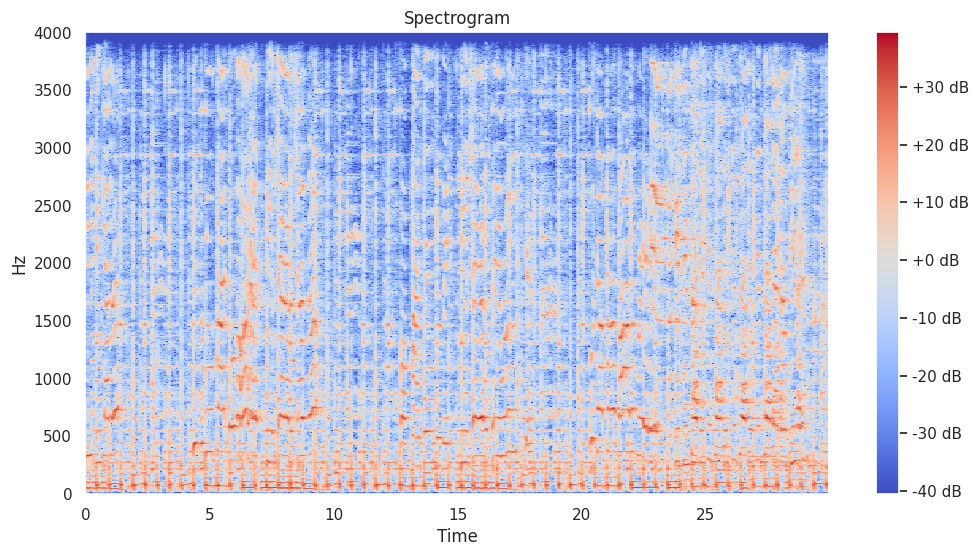

In [ ]:
# Let load .wav file with default sampling rate of 8000Hz
data, sr = librosa.load(data_path, sr=8000)

# Spectrogram of the audio
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')

> ***Recall the moments when certain high-frequency instruments seemed to vanish from our auditory perception?***

> While a waveform primarily provides a visual representation of a sound signal's amplitude over time, it doesn't offer a detailed insight into the frequency components of that signal. This means that when certain frequencies, especially those at the higher end, become inaudible, their absence might not be immediately evident in the waveform.

> Enter the spectrogram. This powerful visualization tool breaks down the audio signal into its constituent frequencies, plotting them over time. With a spectrogram, the absence of specific frequencies becomes starkly evident. In our case, if we observe the spectrogram, we'll notice a clear absence of information above 4000Hz. This range is where many high-frequency instruments resonate. By using the spectrogram, not only can we pinpoint the exact frequencies that are missing or diminished, but we can also gain insights into the characteristics and nuances of the audio signal that might be overlooked in a simple waveform representation.

> In essence, while waveforms give us a broad overview of an audio signal's dynamics, spectrograms delve deeper, revealing the intricate dance of frequencies that make up that signal. This distinction becomes crucial when analyzing or processing complex sounds, ensuring that no detail, no matter how subtle, goes unnoticed.

## Mel-Spectrogram

> While spectrograms offer a detailed view of the frequency content of a signal over time, they might not always align with human auditory perception. Our ears don't perceive all frequencies equally; we are more sensitive to certain frequency ranges, especially those corresponding to speech and many musical instruments. The linear frequency scaling of a spectrogram might not be the most efficient or informative when analyzing sounds in terms of how humans perceive them.

> Enter the **Mel-spectrogram**, which addresses this very limitation. The Mel-spectrogram is based on the Mel scale, a perceptual scale of pitches judged by listeners to be equal in distance from one another. This scale more closely approximates the human ear's response to different frequencies, making it particularly valuable for tasks like speech and music analysis.

> The Mel-spectrogram is a representation of the short-term power spectrum of sound, similar to the spectrogram, but with the frequency axis warped to the Mel scale. This warping of the frequency axis makes the Mel-spectrogram more representative of human auditory perception.

> In practical terms, the Mel-spectrogram emphasizes the frequency bands that are most important for human hearing and understanding. For instance, it gives more resolution to the frequency bands where the human ear is most sensitive (like those corresponding to speech) and less resolution where it's less sensitive (like very high frequencies).

The process to obtain a Mel-spectrogram involves:

1. Computing the spectrogram of the audio signal.
2. Mapping the spectrogram values to the Mel scale, typically using a set of overlapping triangular filters.
3. Often, taking the logarithm of the Mel-scaled power values to further approximate human perception.

> In essence, while both spectrograms and Mel-spectrograms provide insights into the frequency content of audio signals, the Mel-spectrogram does so in a way that's more attuned to human auditory perception, making it a preferred choice for many applications, especially in speech and music analysis.

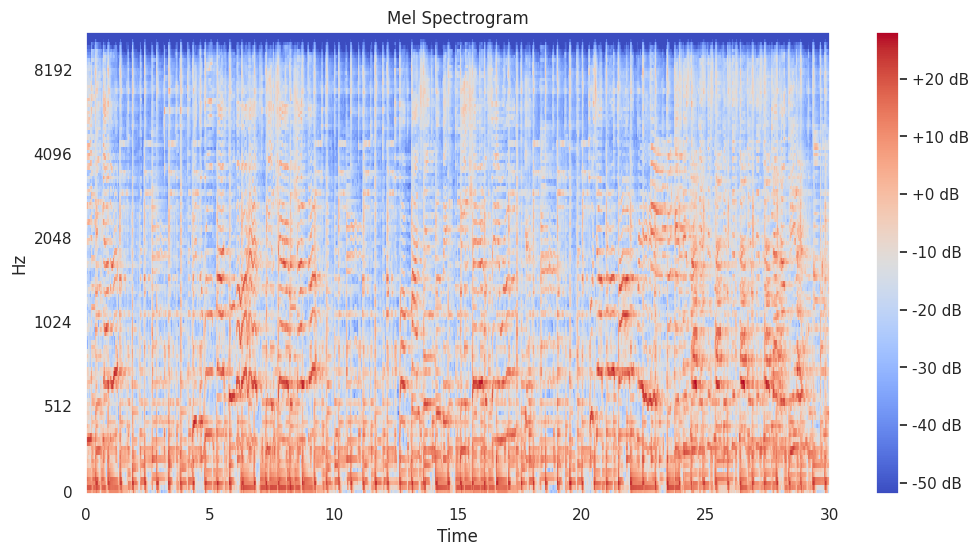

In [ ]:
# Let load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Creating log mel spectrogram
plt.figure(figsize=(12, 6))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=sr//2)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=sr//2, x_axis='time');
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')

# Root mean square Energy (RMS-E)

> In the context of audio and signal processing, RMS-E is commonly used to measure the magnitude or "volume" of an audio signal.

> **Explanation:**
* Square: For each sample in the signal, square its value. Squaring ensures that all values are positive, so we don't end up with cancellations when summing them up. This step emphasizes larger values over smaller ones.
* Mean: Calculate the average (mean) of these squared values. This gives us a sense of the signal's overall energy.
* Root: Finally, take the square root of this mean value. This brings the measurement back to a scale that's comparable to the original signal values.

> ***Application in Audio:***
* In audio processing, the RMS value of a signal provides a measure of the signal's overall amplitude or "loudness." It's a more meaningful measure than simply taking an average of the absolute values because it gives more weight to larger values (peaks in the audio signal).
* For instance, if you have an audio clip with mostly silence but a few loud spikes, the RMS value will be higher than the average amplitude, reflecting the presence of those loud spikes.

> **Why is it Important?**
* RMS is a crucial metric in audio because our perception of loudness is more closely related to the RMS level of a sound rather than its peak level. Two sounds with the same peak level can have different perceived loudness if one has a higher RMS level. This is why RMS is often used in audio normalization and compression algorithms to ensure consistent perceived loudness across different audio tracks or segments.

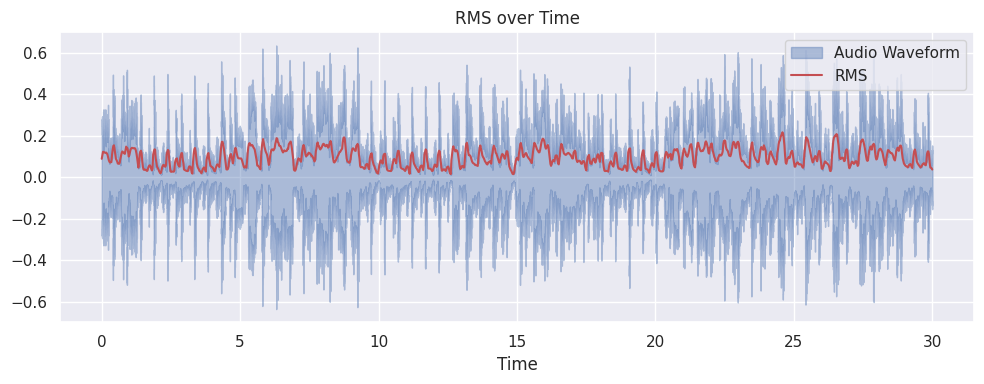

In [ ]:
# Let load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute RMS
rms = librosa.feature.rms(y=data)

# Plot RMS
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4, label='Audio Waveform')
plt.plot(librosa.times_like(rms[0], sr=sr), rms[0], color='r', label='RMS')
plt.legend(loc='upper right')
plt.title('RMS over Time')
plt.tight_layout()
plt.show()

## Zero-crossing rate

> The Zero Crossing Rate (ZCR) is a fundamental feature in audio signal processing and analysis. It represents the rate at which a signal changes its sign, i.e., goes from positive to negative or vice versa.

> **What It Tells Us:**
> * Frequency Content: A higher zero crossing rate often indicates the presence of higher frequencies in the signal, while a lower rate suggests lower frequencies. This makes sense because higher frequency components will cause the signal to oscillate (cross zero) more frequently.
> * Noise Detection: Noise, especially of the high-frequency variety, can result in increased zero crossings. Thus, an unexpectedly high ZCR can sometimes be an indicator of noise.
> * Speech Analysis: In speech processing, the ZCR can help distinguish between voiced and unvoiced speech segments. Voiced segments, like vowels, tend to have a lower ZCR, while unvoiced segments, like consonants such as "s" or "f", tend to have a higher ZCR.

> This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

ZRC = 123


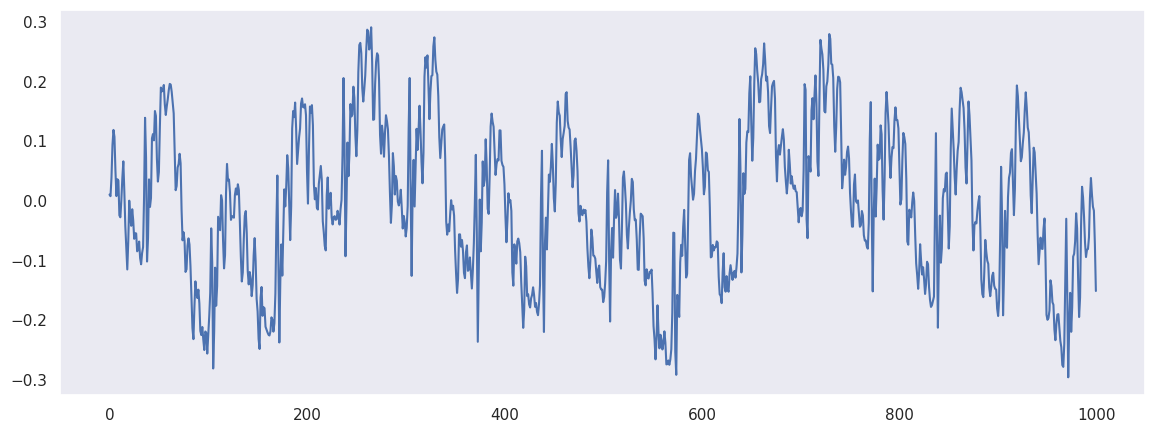

In [ ]:
## Example of ZCR

# Let load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Calculate ZRC of the first 1000 data point of our song
n0 = 0
n1 = 1000
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print(f'ZRC = {sum(zero_crossings)}')

## Spectral roll-off

> Spectral roll-off is a measure used in audio signal processing and analysis to characterize the spectral shape of an audio signal. It represents a threshold below which a specified percentage of the total spectral energy is contained.

> The spectral roll-off point is typically defined as the frequency below which a certain percentage (often 85% to 95%) of the total spectral energy lies. In other words, if you were to sum the magnitudes of the spectral components from the lowest frequency up to the roll-off frequency, it would account for, say, 85% of the total spectral energy of the signal.

> What It Tells Us:
* Spectral Shape: Spectral roll-off provides insights into the shape of the spectrum. A lower roll-off frequency might indicate a signal that's more concentrated in the lower frequencies, while a higher roll-off could suggest a broader or flatter spectrum.
* Harmonic Content: In musical signals, a lower roll-off might indicate the dominance of lower harmonics, while a higher roll-off could suggest the presence of higher harmonics or noise.
* Differentiating Sounds: Spectral roll-off can help differentiate between harmonic-rich instruments and those with significant high-frequency noise or overtones.
Applications:

> Spectral roll-off is employed in various audio processing tasks, including:
* Music Information Retrieval: To differentiate musical instruments or classify genres.
* Speech Processing: To characterize and differentiate various phonemes or speech sounds.
* Noise Detection: To identify the presence of high-frequency noise in a signal.

> In essence, spectral roll-off serves as a compact descriptor of the spectral shape of an audio signal, offering insights into its frequency distribution and harmonic content.






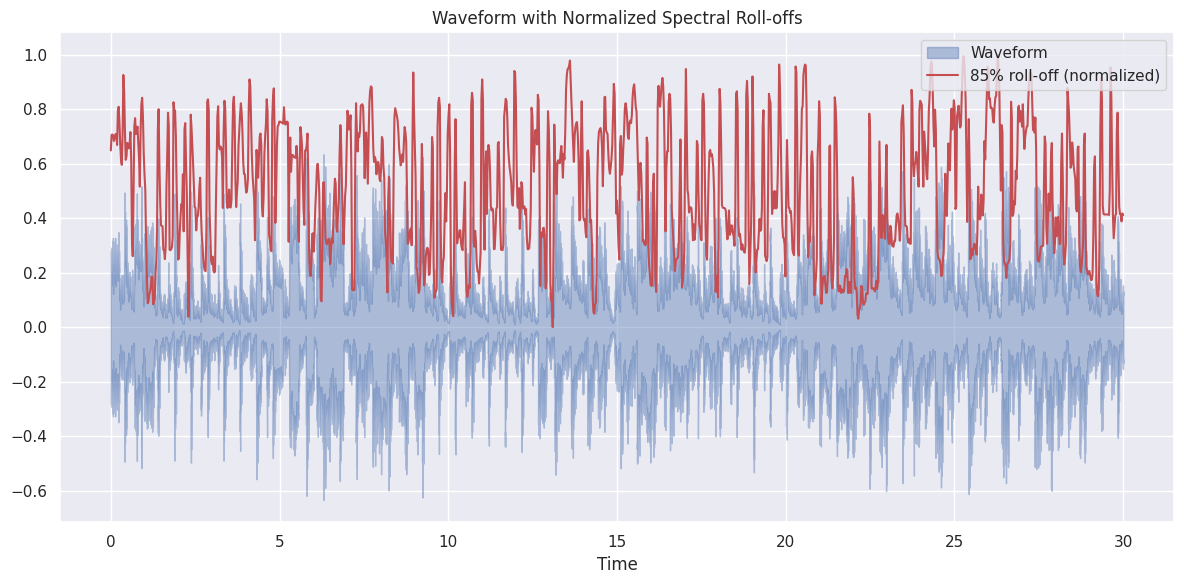

In [ ]:
import sklearn.preprocessing

# Function to normalize an array
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Load the audio file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute and norm the spectral roll-off
rolloff_85 = librosa.feature.spectral_rolloff(y=data, sr=sr, roll_percent=0.85)[0]
rolloff_85_norm = normalize(rolloff_85)

# Plot the waveform and normalized spectral roll-offs
plt.figure(figsize=(12, 6))
librosa.display.waveshow(data, sr=sr, alpha=0.4, label='Waveform')
times = librosa.times_like(rolloff_85)
plt.plot(times, rolloff_85_norm, color='r', label='85% roll-off (normalized)')

plt.title('Waveform with Normalized Spectral Roll-offs')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Spectral Centroid

> The spectral centroid is a measure used in digital signal processing to characterize the "brightness" or "sharpness" of a sound. It provides a center of gravity or a "balance point" for the spectrum of a sound signal, indicating where the "center of mass" of the spectrum is located.

> ***Conceptual Understanding:***
>
> Imagine a physical object, like a seesaw, where the balance point indicates the center of mass. Similarly, the spectral centroid represents the balance point of the spectrum of a sound. If most of the energy of a sound is concentrated in the lower frequencies, the spectral centroid will be lower, indicating a "darker" or "muddier" sound. Conversely, if the energy is concentrated in higher frequencies, the spectral centroid will be higher, indicating a "brighter" or "sharper" sound.

> ***Applications and Insights:***

> Timbre Analysis: The spectral centroid is often used in music and audio analysis to describe the timbre or color of a sound. Instruments or sounds with a higher spectral centroid are often perceived as brighter, while those with a lower centroid are perceived as darker.
> Music Information Retrieval: It can be used to differentiate musical instruments, classify genres, or even detect the mood of a song.
> Speech Processing: The spectral centroid can help in distinguishing between different phonemes or types of speech sounds.
> Sound Design: In sound synthesis and design, adjusting the spectral centroid can help in achieving desired tonal qualities.

> While the spectral centroid provides valuable insights into the spectral content of a sound, it's a single value and doesn't capture the full complexity of a sound's timbre. It's often used in conjunction with other spectral features for a more comprehensive analysis.

> In essence, the spectral centroid offers a way to quantify the perceived brightness of a sound, providing a snapshot of its spectral distribution and serving as a foundational tool in audio analysis and processing.

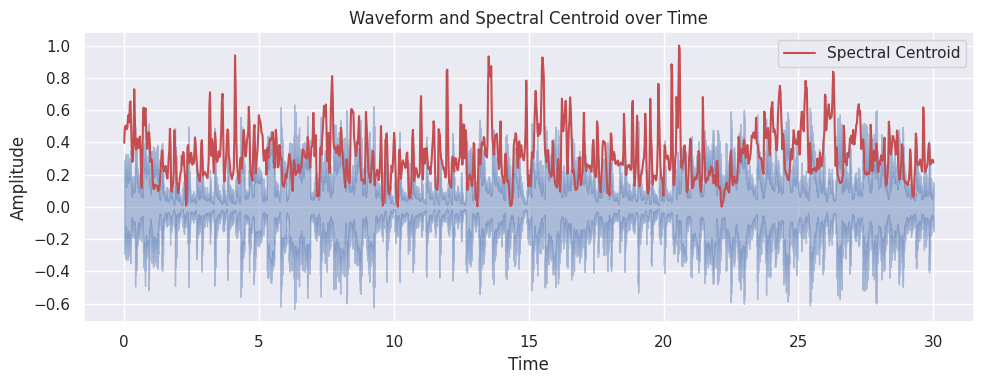

In [ ]:
# Let load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute the spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sr)

# Normalize function
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plotting
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4)
frames = range(len(spectral_centroids[0]))
t = librosa.frames_to_time(frames)
plt.plot(t, normalize(spectral_centroids[0]), color='r', label='Spectral Centroid')

# Set labels and title
plt.title('Waveform and Spectral Centroid over Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Spectral Band Width

> Spectral bandwidth is a measure used in the field of audio signal processing and acoustics to describe the width of the spectrum of a sound signal. In simpler terms, it quantifies how wide the distribution of frequencies in a sound is. A sound with a narrow bandwidth might be more tonal or "pure," while a sound with a wide bandwidth might be noisier or have more harmonic content.
* Narrow Bandwidth: If a sound has a narrow spectral bandwidth, it means most of its energy is concentrated around a specific frequency range. For instance, a pure sine wave has a very narrow bandwidth because its energy is concentrated at a single frequency.
* Wide Bandwidth: A sound with a wide spectral bandwidth has its energy spread out over a broader range of frequencies. White noise, for instance, has a very wide bandwidth because it contains all frequencies with equal energy.

> Given a spectrum, the spectral bandwidth is often defined in relation to the spectral centroid. The spectral centroid represents the "center of mass" of the spectrum. The spectral bandwidth then measures the spread of the spectrum around this centroid.

> ***Application in Audio Processing:***
* Music Analysis: To differentiate between harmonic (tonal) and non-harmonic (noisy) parts of a song.
* Speech Processing: To identify certain phonetic characteristics.
* Sound Classification: To distinguish between different types of sounds based on their frequency spread.

> In summary, spectral bandwidth provides insight into the frequency distribution of a sound, helping differentiate between tonal and noisy components.

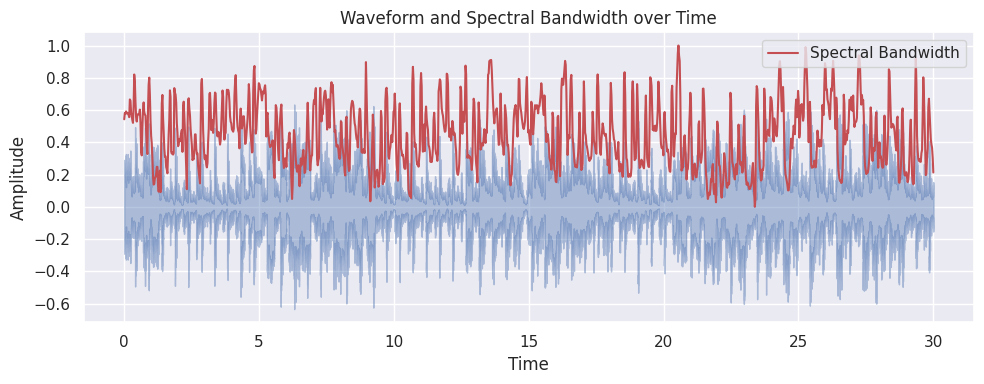

In [ ]:
# Let load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute the spectral bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sr)

# Plotting
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4)
frames = range(len(spectral_bandwidth[0]))
t = librosa.frames_to_time(frames)
plt.plot(t, normalize(spectral_bandwidth[0]), color='r', label='Spectral Bandwidth')

# Set labels and title
plt.title('Waveform and Spectral Bandwidth over Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Chroma feature

> Chroma features are a powerful tool in audio signal processing, particularly in the context of music. They relate to the twelve different pitch classes and are often used to describe harmony and chords in music.

> ***Conceptual Understanding:***
>
> In Western music, there are 12 unique pitch classes, corresponding to the 12 notes in an octave (e.g., C, C#, D, D#, ..., B). Chroma features capture the energy content in each of these 12 pitch classes, regardless of the specific octave. This makes chroma features somewhat invariant to the absolute pitch and more focused on the harmonic content.

> ***Applications and Insights:***
>
> Chord Recognition: Since chroma features capture the harmonic content of music, they are widely used in algorithms for automatic chord recognition.
Music Similarity and Retrieval: Chroma features can be used to find sections of music that have similar harmonic progressions, making them useful for tasks like song retrieval or identifying cover songs.
Music Transcription: They can assist in transcribing music, especially in determining the harmonic structure.
Key Detection: Chroma features can also be used to determine the key of a musical piece.

> Chroma features are typically derived from the Short-Time Fourier Transform (STFT) of a signal. The magnitudes of the STFT are mapped to the 12 pitch classes, often using a technique called "bin folding." This process involves taking all the energy from a particular note in all octaves and summing it into one of the 12 chroma bins.

> For example, the energy for the notes C1, C2, C3, etc., from different octaves would all be summed into the chroma bin for the note C.

> In summary, chroma features provide a compact representation of the harmonic content of music, abstracting away from aspects like timbre and rhythm, and focusing on pitch class energy distribution. They are a cornerstone in many music information retrieval tasks due to their ability to capture the essence of musical harmony.

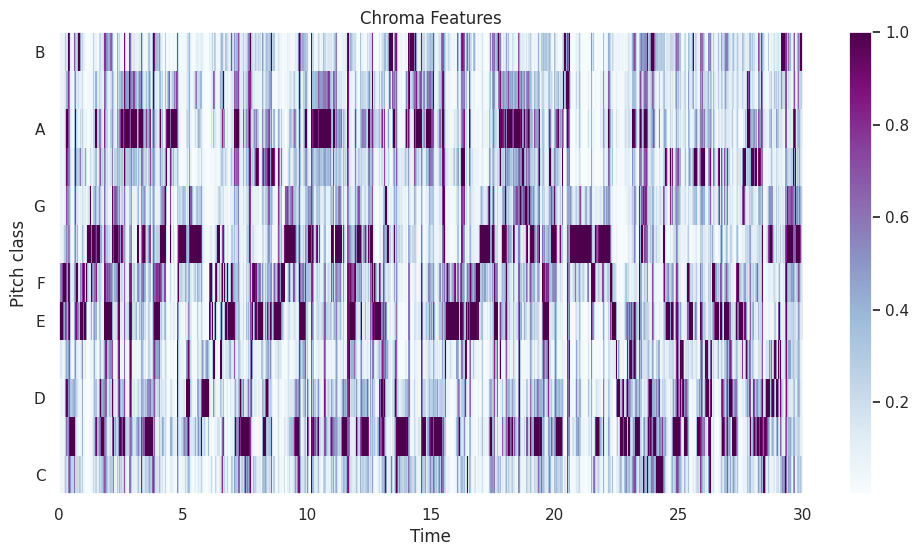

In [ ]:
# Let load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

chroma = librosa.feature.chroma_stft(y=data,sr=sr)
plt.figure(figsize=(12,6))
librosa.display.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="BuPu")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

## Harmonic and Percussive



In [ ]:
# import librosa
from IPython.display import Audio, display
# import matplotlib.pyplot as plt

# Load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Separate the harmonic and percussive components
data_harmonic, data_percussive = librosa.effects.hpss(data)

# Create audio widgets for original, harmonic, and percussive components
print('Original:')
display(Audio(data, rate=sr))

print('Harmonic:')
display(Audio(data_harmonic, rate=sr))

print('Percussive:')
display(Audio(data_percussive, rate=sr))

# Plot the original, harmonic, and percussive waveforms (optional)
plt.figure(figsize=(12, 8))

# Original waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(data, sr=sr, alpha=0.7)
plt.title('Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Harmonic component
plt.subplot(3, 1, 2)
librosa.display.waveshow(data_harmonic, sr=sr, alpha=0.7, color='g')
plt.title('Harmonic Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Percussive component
plt.subplot(3, 1, 3)
librosa.display.waveshow(data_percussive, sr=sr, alpha=0.7, color='r')
plt.title('Percussive Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


This cell output is too large and can only be displayed while logged in.


## Mel-Frequency Cepstral Coefficients (MFCC)

> MFCCs are a set of features commonly used in audio signal processing, especially in the context of speech and voice recognition. They provide a compact representation of the short-term power spectrum of sound and are based on human hearing perceptions.

> ***Conceptual Understanding:***
* Mel Scale: The term "Mel" refers to a perceptual scale of pitches judged by listeners to be equal in distance from one another. The Mel scale approximates the human ear's response to different frequencies. In essence, we perceive differences in lower frequencies more clearly than differences in higher frequencies. The Mel scale captures this non-linear relationship.
* Cepstral Analysis: "Cepstrum" is derived from reversing the first four letters of the spectrum. It's a nonlinear transformation of the spectrum, and cepstral coefficients provide a way to capture the periodicity (or rhythm) of a signal.

> ***The computation of MFCCs involves several steps:***
* Frame the Signal: The continuous audio signal is divided into short frames (typically 20-40 ms long).
* Compute the Periodogram: For each frame, compute the periodogram estimate of the power spectrum.
* Apply Mel Filterbank: The power spectrum is then passed through a set of Mel filters. These filters are spaced to match the Mel scale, with more filters in the lower frequencies and fewer in the higher frequencies.
* Take the Logarithm: Compute the logarithm of the energy in each Mel filter.
* Discrete Cosine Transform (DCT): Finally, the DCT of the log filterbank energies is computed. Only a subset of the resulting coefficients (usually the first 12-13) are kept as the MFCCs. The higher-order coefficients are discarded as they represent fast changes in the filterbank energies and are less relevant for audio recognition tasks.

> ***Applications and Insights:***
* Speech Recognition: MFCCs are one of the most popular features used in automatic speech and speaker recognition. They capture the phonetic content of the speech signal.
* Music Information Retrieval: While more common in speech processing, MFCCs are also used in some music information retrieval tasks, such as genre classification or instrument recognition.
* Voice Authentication: MFCCs can be used in voice biometrics to authenticate users based on their unique voice characteristics.

> In summary, MFCCs provide a representation of the short-term spectral shape of sound. They are designed to mimic the human auditory system, making them particularly effective for tasks related to human speech and voice.

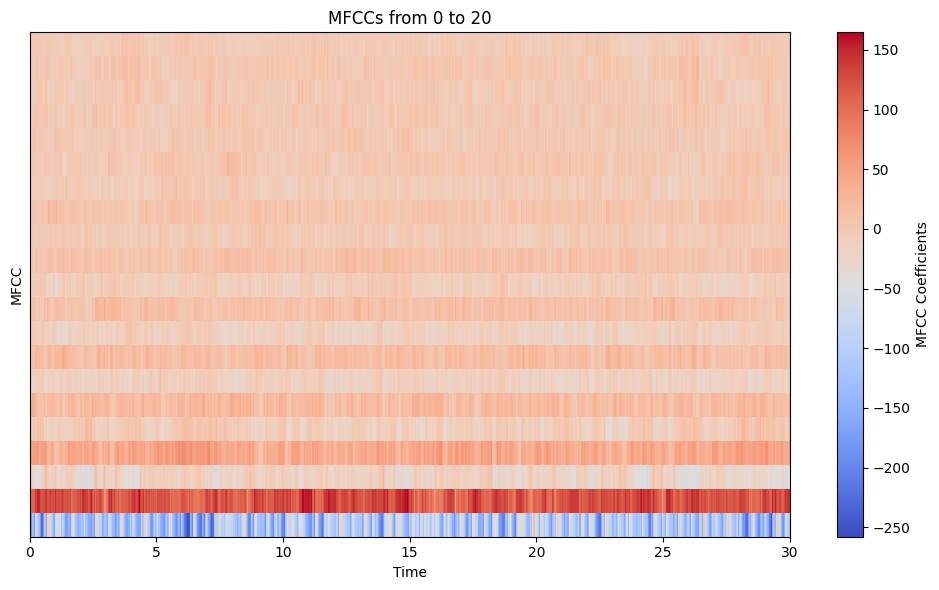

In [ ]:
# Let load .wav file with default sampling rate of 22,050Hz
data, sr = librosa.load(data_path)

# Compute the MFCCs
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=21)  # Compute 21 MFCCs to include 0 to 20

# Visualize the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(label='MFCC Coefficients')
plt.ylabel('MFCC')
plt.title('MFCCs from 0 to 20')
plt.tight_layout()
plt.show()

# Recreate GTZAN Features extraction dataset

In [ ]:
from glob import glob
import pandas as pd

num_segment=10
num_mfcc=20
sample_rate=22050
n_fft=2048
hop_length=512

my_csv={"filename":[], "chroma_stft_mean": [], "chroma_stft_var": [], "rms_mean": [], "rms_var": [], "spectral_centroid_mean": [],
        "spectral_centroid_var": [], "spectral_bandwidth_mean": [], "spectral_bandwidth_var": [], "rolloff_mean": [], "rolloff_var": [],
        "zero_crossing_rate_mean": [], "zero_crossing_rate_var": [], "harmony_mean": [], "harmony_var": [], "perceptr_mean": [],
        "perceptr_var": [], "tempo": [], "mfcc1_mean": [], "mfcc1_var" : [], "mfcc2_mean" : [], "mfcc2_var" : [],
        "mfcc3_mean" : [], "mfcc3_var" : [], "mfcc4_mean" : [], "mfcc4_var" : [], "mfcc5_mean" : [],
        "mfcc5_var" : [], "mfcc6_mean" : [], "mfcc6_var" : [], "mfcc7_mean" : [], "mfcc7_var" : [],
        "mfcc8_mean" : [], "mfcc8_var" : [], "mfcc9_mean" : [], "mfcc9_var" : [], "mfcc10_mean" : [],
        "mfcc10_var" : [], "mfcc11_mean" : [], "mfcc11_var" : [], "mfcc12_mean" : [], "mfcc12_var" : [],
        "mfcc13_mean" : [], "mfcc13_var" : [], "mfcc14_mean" : [], "mfcc14_var" : [], "mfcc15_mean" : [],
        "mfcc15_var" : [], "mfcc16_mean" : [], "mfcc16_var" : [], "mfcc17_mean" : [], "mfcc17_var" : [],
        "mfcc18_mean" : [], "mfcc18_var" : [], "mfcc19_mean" : [], "mfcc19_var" : [], "mfcc20_mean" : [],
        "mfcc20_var":[], "label":[]}

In [ ]:
dataset_path="/content/GTZAN/genres_original"
audio_files = glob(dataset_path + "/*/*")
genre = glob(dataset_path + "/*")
n_genres=len(genre)
genre=[genre[x].split('/')[-1] for x in range(n_genres)]
print(genre)

['reggae', 'disco', 'jazz', 'country', 'blues', 'classical', 'hiphop', 'metal', 'pop', 'rock']


In [ ]:
samples_per_segment = int(sample_rate*30/num_segment)

genre=""
for f in sorted(audio_files):
    if genre!=f.split('/')[-2]:
        genre=f.split('/')[-2]
        print("Processsing " + genre + "...")
    fname=f.split('/')[-1]
    try:
        y, sr = librosa.load(f, sr=sample_rate)
    except:
        continue

    for n in range(num_segment):
        y_seg = y[samples_per_segment*n: samples_per_segment*(n+1)]
        #Chromagram
        chroma_hop_length = 512
        chromagram = librosa.feature.chroma_stft(y=y_seg, sr=sample_rate, hop_length=chroma_hop_length)
        my_csv["chroma_stft_mean"].append(chromagram.mean())
        my_csv["chroma_stft_var"].append(chromagram.var())

        #Root Mean Square Energy
        RMSEn= librosa.feature.rms(y=y_seg)
        my_csv["rms_mean"].append(RMSEn.mean())
        my_csv["rms_var"].append(RMSEn.var())

        #Spectral Centroid
        spec_cent=librosa.feature.spectral_centroid(y=y_seg)
        my_csv["spectral_centroid_mean"].append(spec_cent.mean())
        my_csv["spectral_centroid_var"].append(spec_cent.var())

        #Spectral Bandwith
        spec_band=librosa.feature.spectral_bandwidth(y=y_seg,sr=sample_rate)
        my_csv["spectral_bandwidth_mean"].append(spec_band.mean())
        my_csv["spectral_bandwidth_var"].append(spec_band.var())

        #Rolloff
        spec_roll=librosa.feature.spectral_rolloff(y=y_seg,sr=sample_rate)
        my_csv["rolloff_mean"].append(spec_roll.mean())
        my_csv["rolloff_var"].append(spec_roll.var())

        #Zero Crossing Rate
        zero_crossing=librosa.feature.zero_crossing_rate(y=y_seg)
        my_csv["zero_crossing_rate_mean"].append(zero_crossing.mean())
        my_csv["zero_crossing_rate_var"].append(zero_crossing.var())

        #Harmonics and Perceptrual
        harmony, perceptr = librosa.effects.hpss(y=y_seg)
        my_csv["harmony_mean"].append(harmony.mean())
        my_csv["harmony_var"].append(harmony.var())
        my_csv["perceptr_mean"].append(perceptr.mean())
        my_csv["perceptr_var"].append(perceptr.var())

        #Tempo
        tempo, _ = librosa.beat.beat_track(y=y_seg, sr=sample_rate)
        my_csv["tempo"].append(tempo)

        #MFCC
        mfcc=librosa.feature.mfcc(y=y_seg,sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc=mfcc.T


        fseg_name='.'.join(fname.split('.')[:2])+f'.{n}.wav'
        my_csv["filename"].append(fseg_name)
        my_csv["label"].append(genre)
        for x in range(20):
            feat1 = "mfcc" + str(x+1) + "_mean"
            feat2 = "mfcc" + str(x+1) + "_var"
            my_csv[feat1].append(mfcc[:,x].mean())
            my_csv[feat2].append(mfcc[:,x].var())
    print(fname)

df = pd.DataFrame(my_csv)
df.to_csv('/content/GTZAN/features_3_sec.csv', index=False)

Processsing blues...
blues.00000.wav
blues.00001.wav
blues.00002.wav
blues.00003.wav
blues.00004.wav
blues.00005.wav
blues.00006.wav
blues.00007.wav
blues.00008.wav
blues.00009.wav
blues.00010.wav
blues.00011.wav
blues.00012.wav
blues.00013.wav
blues.00014.wav
blues.00015.wav
blues.00016.wav
blues.00017.wav
blues.00018.wav
blues.00019.wav
blues.00020.wav
blues.00021.wav
blues.00022.wav
blues.00023.wav
blues.00024.wav
blues.00025.wav
blues.00026.wav
blues.00027.wav
blues.00028.wav
blues.00029.wav
blues.00030.wav
blues.00031.wav
blues.00032.wav
blues.00033.wav
blues.00034.wav
blues.00035.wav
blues.00036.wav
blues.00037.wav
blues.00038.wav
blues.00039.wav
blues.00040.wav
blues.00041.wav
blues.00042.wav
blues.00043.wav
blues.00044.wav
blues.00045.wav
blues.00046.wav
blues.00047.wav
blues.00048.wav
blues.00049.wav
blues.00050.wav
blues.00051.wav
blues.00052.wav
blues.00053.wav
blues.00054.wav
blues.00055.wav
blues.00056.wav
blues.00057.wav
blues.00058.wav
blues.00059.wav
blues.00060.wav
blu

<ipython-input-30-f7bb0878cf12>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


jazz.00055.wav
jazz.00056.wav
jazz.00057.wav
jazz.00058.wav
jazz.00059.wav
jazz.00060.wav
jazz.00061.wav
jazz.00062.wav
jazz.00063.wav
jazz.00064.wav
jazz.00065.wav
jazz.00066.wav
jazz.00067.wav
jazz.00068.wav
jazz.00069.wav
jazz.00070.wav
jazz.00071.wav
jazz.00072.wav
jazz.00073.wav
jazz.00074.wav
jazz.00075.wav
jazz.00076.wav
jazz.00077.wav
jazz.00078.wav
jazz.00079.wav
jazz.00080.wav
jazz.00081.wav
jazz.00082.wav
jazz.00083.wav
jazz.00084.wav
jazz.00085.wav
jazz.00086.wav
jazz.00087.wav
jazz.00088.wav
jazz.00089.wav
jazz.00090.wav
jazz.00091.wav
jazz.00092.wav
jazz.00093.wav
jazz.00094.wav
jazz.00095.wav
jazz.00096.wav
jazz.00097.wav
jazz.00098.wav
jazz.00099.wav
Processsing metal...
metal.00000.wav
metal.00001.wav
metal.00002.wav
metal.00003.wav
metal.00004.wav
metal.00005.wav
metal.00006.wav
metal.00007.wav
metal.00008.wav
metal.00009.wav
metal.00010.wav
metal.00011.wav
metal.00012.wav
metal.00013.wav
metal.00014.wav
metal.00015.wav
metal.00016.wav
metal.00017.wav
metal.00018.wav


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/features_3_sec.csv")
df.head()

filename  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0  blues.00000.0.wav          0.335555         0.090997  0.130189  0.003559   
1  blues.00000.1.wav          0.343523         0.086782  0.112119  0.001491   
2  blues.00000.2.wav          0.347746         0.092495  0.130895  0.004552   
3  blues.00000.3.wav          0.363863         0.087207  0.131349  0.002338   
4  blues.00000.4.wav          0.335481         0.088482  0.142370  0.001734   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.358004          169450.829520              1972.334258   
1             1817.244034           90766.297254              2010.751494   
2             1790.722357          110071.206973              2088.184750   
3             1660.545231          109496.936296              1967.920582   
4             1634.465077           77425.419232              1954.633566   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117272.640189   3714.063439  ...   39.547073    -3.230046   
1            65940.666243   3870.510442  ...   64.819786    -6.025472   
2            73391.498001   4000.206581  ...   68.306790    -1.714475   
3            79805.901351   3579.149639  ...   48.543200    -3.786987   
4            57359.695604   3480.096905  ...   30.829542     0.635797   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.606853     0.696385   37.766136    -5.035945   33.668550    -0.239585   
1   40.548813     0.127131   51.048935    -2.808956   97.221500     5.771881   
2   28.136944     2.329553   47.211426    -1.925621   52.922432     2.466996   
3   28.419546     1.153315   35.682700    -3.501979   50.610344     3.580637   
4   44.645554     1.591108   51.415863    -3.364908   26.421085     0.501505   

   mfcc20_var  label  
0   43.818880  blues  
1   60.360348  blues  
2   33.164000  blues  
3   32.325870  blues  
4   29.109531  blues  

[5 rows x 59 columns]

In [ ]:
# # Reading the csv file
# df = pd.read_csv("/content/GTZAN/features_3_sec.csv")
# df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [ ]:
df.describe()

chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean           0.379990         0.084878     0.130072  2.671954e-03   
std            0.090608         0.009674     0.068164  3.560292e-03   
min            0.108073         0.015217     0.000947  4.055916e-08   
25%            0.316090         0.079807     0.083282  6.289852e-04   
50%            0.385192         0.085116     0.120503  1.500568e-03   
75%            0.442904         0.091145     0.175398  3.113753e-03   
max            0.751176         0.120717     0.440458  3.237973e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2202.369980           4.159387e+05              2244.896920   
std                750.391602           4.339124e+05               541.333433   
min                479.905804           2.161498e+03               499.577101   
25%               1634.440203           1.228680e+05              1890.759725   
50%               2213.635012           2.646154e+05              2233.838250   
75%               2714.394795           5.611495e+05              2591.195841   
max               5432.278846           4.801847e+06              3708.279662   

       spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  mfcc16_mean  \
count            9.990000e+03   9990.000000  9.990000e+03  ...  9990.000000   
mean             1.183063e+05   4572.537006  1.623622e+06  ...     1.427954   
std              1.002217e+05   1639.176667  1.482200e+06  ...     5.725414   
min              1.295350e+03    673.906438  1.130834e+03  ...   -26.764162   
25%              4.943213e+04   3390.961867  5.569716e+05  ...    -2.233532   
50%              9.034532e+04   4636.264273  1.156686e+06  ...     1.444074   
75%              1.578898e+05   5597.970252  2.251552e+06  ...     5.103708   
max              1.237131e+06   9486.121357  1.293661e+07  ...    39.147713   

        mfcc16_var  mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     49.862150    -4.192179    51.817818     0.724030    52.329103   
std      34.349218     5.667050    36.292800     5.173894    38.055529   
min       1.343237   -27.932219     1.531854   -20.749744     3.445751   
25%      29.516235    -7.944616    29.816505    -2.521760    29.398639   
50%      41.481305    -4.443324    42.215925     0.728384    41.682190   
75%      59.059199    -0.732971    61.422580     3.869063    61.840459   
max     682.968140    33.869507   523.140560    36.923040   628.774400   

       mfcc19_mean   mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  9990.000000  
mean     -2.497078    54.794080    -0.928750    57.124850  
std       5.105615    41.493448     5.245859    46.327530  
min     -27.359076     3.147766   -35.614895     0.253587  
25%      -5.734799    30.382706    -4.012598    29.922271  
50%      -2.699554    43.243168    -1.044268    44.156437  
75%       0.521311    65.132598     2.193336    67.996489  
max      31.367565  1147.502400    34.130856   914.816200  

[8 rows x 57 columns]

In [ ]:
# Shape of the data
df.shape

(9990, 59)

In [ ]:
# Data type of the data
df.dtypes

filename                    object
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean          

In [ ]:
# Drop the column filename as it is no longer required for training
df=df.drop(labels="filename",axis=1)

In [ ]:
# # Drop the column length as it is constant
# df=df.drop(labels="length",axis=1)

In [ ]:
X, y =  df.iloc[:,:-1], df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding - encod the categorical classes with numerical integer values for training

# Blues - 0
# Classical - 1
# Country - 2
# Disco - 3
# Hip-hop - 4
# Jazz - 5
# Metal - 6
# Pop - 7
# Reggae - 8
# Rock - 9

encoder=LabelEncoder()
y=encoder.fit_transform(y)
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# splitting 70% data into training set and the remaining 30% to test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1234)

In [ ]:
# test data size
len(y_test)

2997

In [ ]:
# size of training data
len(y_train)

6993

## K-Nearest Neighbors (KNN)

KNN is a fundamental Machine learning algorithm that is most commonly used among all kinds of problems. It classifies the data points based on the point that is near them by finding the euclidians distance given by $$d = \sqrt{(x2-x1)^2 - (y2-y1)^2}$$ as a metric.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Training set score: 0.953
Test set score: 0.891
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       312
           1       0.91      0.96      0.93       314
           2       0.81      0.87      0.84       291
           3       0.81      0.92      0.86       300
           4       0.91      0.88      0.90       294
           5       0.90      0.86      0.88       320
           6       0.97      0.93      0.95       295
           7       0.95      0.84      0.89       302
           8       0.86      0.90      0.88       276
           9       0.91      0.82      0.86       293

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



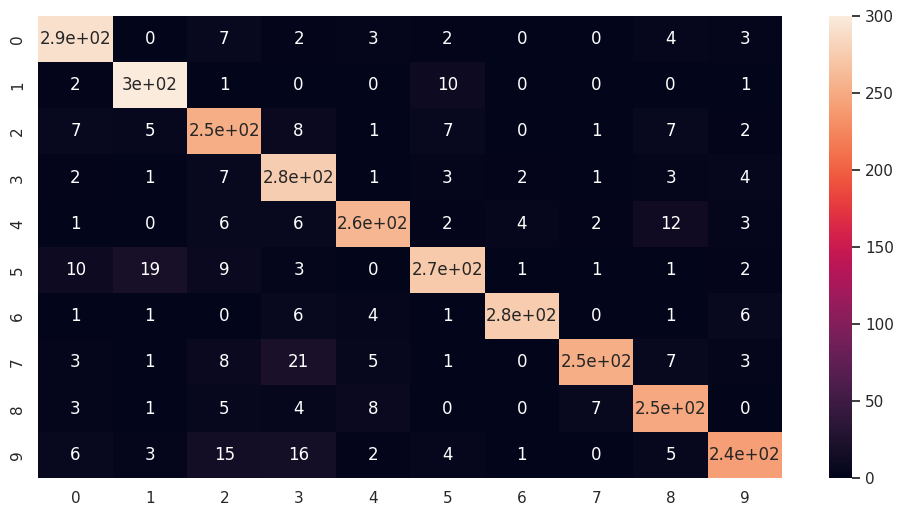

In [ ]:
knn_cls=KNeighborsClassifier(n_neighbors=3)
knn_cls.fit(X_train,y_train)
y_pred=knn_cls.predict(X_test)

print("Training set score: {:.3f}".format(knn_cls.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn_cls.score(X_test, y_test)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test,y_pred))

## Support Vector Machine (SVM)

SVM is one of the best machine learning models. Since the data is not linearly separable, we have used the SVM kernel function as sigmoid. The sigmoid function is given by $$K(y_n,y_i) = \tanh(-\gamma*(y_n,y_i)+r)$$

In [ ]:
from sklearn.svm import SVC

Training set score: 0.919
Test set score: 0.845
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       312
           1       0.88      0.96      0.92       314
           2       0.81      0.80      0.80       291
           3       0.78      0.80      0.79       300
           4       0.92      0.80      0.86       294
           5       0.87      0.88      0.88       320
           6       0.89      0.91      0.90       295
           7       0.89      0.88      0.89       302
           8       0.80      0.85      0.83       276
           9       0.75      0.71      0.73       293

    accuracy                           0.84      2997
   macro avg       0.84      0.84      0.84      2997
weighted avg       0.85      0.84      0.84      2997



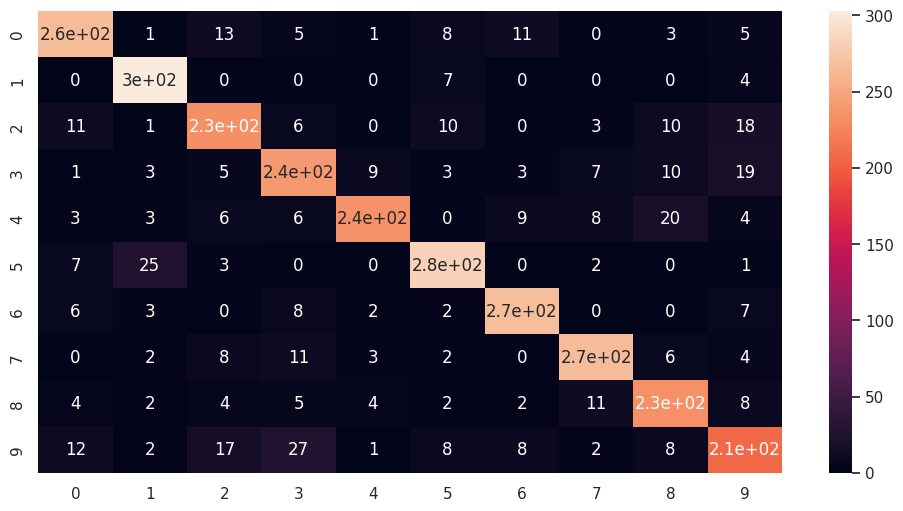

In [ ]:
svm_cls = SVC(kernel='rbf', degree=8)
svm_cls.fit(X_train, y_train)

print("Training set score: {:.3f}".format(svm_cls.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_cls.score(X_test, y_test)))

y_pred = svm_cls.predict(X_test)

cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))

## Feed-forward Neural Network

In [ ]:
import os
import numpy as np

import torch
from torch import nn, optim
from torch.functional import F
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = self.dropout(x)
        x = self.fc6(x)
        return x

In [ ]:
input_size = X_train.shape[1]
model = MLP(input_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000146)

In [ ]:
num_epochs = 300
batch_size = 256

train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

step = 0

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if step % 100 ==0:
          print(f"Step {step}, Train Loss: {loss.item():.4f}")
        step += 1

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs.float())
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Step 0, Train Loss: 2.3124
Epoch 1/300, Validation Loss: 2.2818, Validation Accuracy: 15.32%
Epoch 2/300, Validation Loss: 2.1644, Validation Accuracy: 28.03%
Epoch 3/300, Validation Loss: 1.9123, Validation Accuracy: 30.83%
Step 100, Train Loss: 1.8678
Epoch 4/300, Validation Loss: 1.6958, Validation Accuracy: 40.77%
Epoch 5/300, Validation Loss: 1.5479, Validation Accuracy: 44.78%
Epoch 6/300, Validation Loss: 1.4482, Validation Accuracy: 48.05%
Epoch 7/300, Validation Loss: 1.3749, Validation Accuracy: 49.65%
Step 200, Train Loss: 1.4949
Epoch 8/300, Validation Loss: 1.3194, Validation Accuracy: 51.62%
Epoch 9/300, Validation Loss: 1.2717, Validation Accuracy: 54.09%
Epoch 10/300, Validation Loss: 1.2399, Validation Accuracy: 55.22%
Step 300, Train Loss: 1.2945
Epoch 11/300, Validation Loss: 1.2145, Validation Accuracy: 55.12%
Epoch 12/300, Validation Loss: 1.1814, Validation Accuracy: 56.66%
Epoch 13/300, Validation Loss: 1.1538, Validation Accuracy: 57.32%
Epoch 14/300, Validation

Expected Index: [8 7 7 ... 7 0 9], Predicted Index: [8 7 7 ... 7 0 9]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       312
           1       0.93      0.97      0.95       314
           2       0.86      0.86      0.86       291
           3       0.89      0.86      0.87       300
           4       0.93      0.88      0.91       294
           5       0.94      0.91      0.93       320
           6       0.92      0.95      0.94       295
           7       0.94      0.91      0.92       302
           8       0.86      0.92      0.89       276
           9       0.82      0.80      0.81       293

    accuracy                           0.90      2997
   macro avg       0.90      0.90      0.90      2997
weighted avg       0.90      0.90      0.90      2997



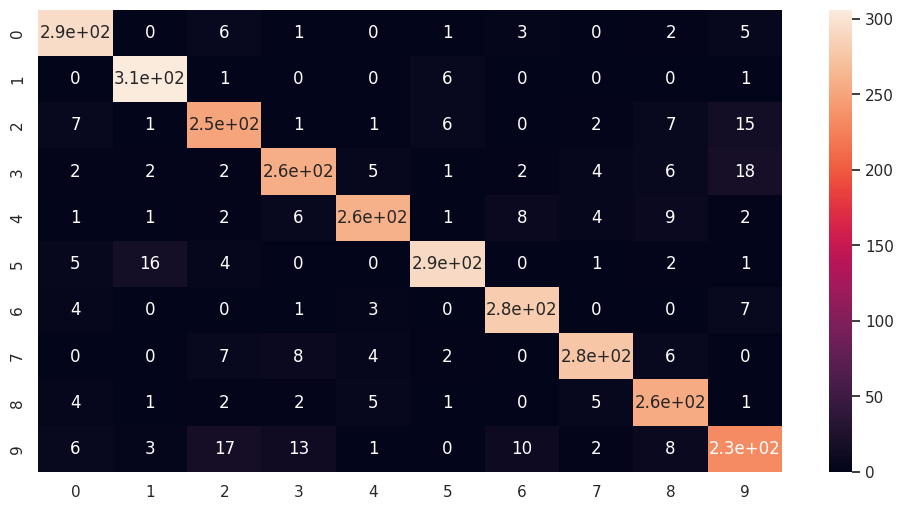

In [ ]:
# Sample testing
model.eval()
with torch.no_grad():
    predictions = model(torch.tensor(X_test).float())
    _, predicted_indices = predictions.max(1)
    print("Expected Index: {}, Predicted Index: {}".format(y_test, predicted_indices.numpy()))

# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
import seaborn as sns

y_pred = predicted_indices.numpy()
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test, y_pred))